In [109]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from scipy import optimize
%matplotlib inline

In [132]:
data = sio.loadmat('data/regularized_logistic_regression.mat')
x = data['X']
y = data['y']
xval = data['Xval']
yval = data['yval']
xtest = data['Xtest']
ytest = data['ytest']

Text(0, 0.5, 'Water flowing out of the dam (y)')

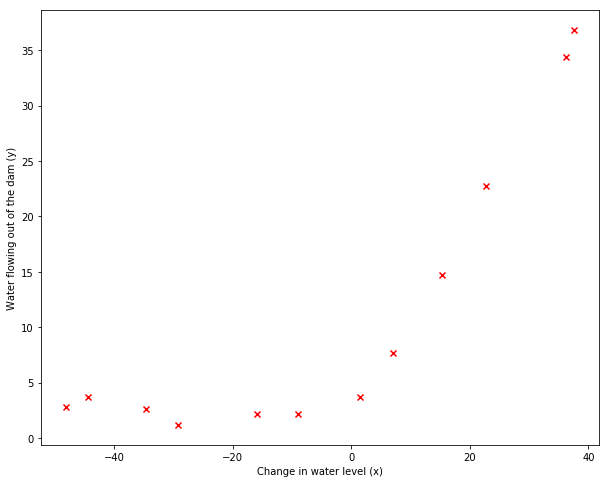

In [133]:
#visualize data
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y,marker='x',color='r')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

In [134]:
#build polygon features
def poly_features(x,p):
    X = np.ones((x.shape[0],1))
    for i in range(1,p+1):
        X = np.c_[X,x**i]
    return X

In [135]:
#feature normalization
def normalize_features(X):
    x_mean = X[...,1:].mean(axis=0)
    x_std = X[...,1:].std(axis=0)
    x_normalized = (X[...,1:]-x_mean)/x_std
    x_normalized = np.c_[X[...,:1],x_normalized]
    return (x_normalized,np.r_[1,x_mean],np.r_[0,x_std])

In [170]:
#compute cost and gradients
def cost(theta,*args):
    X,y,lambd = args
    theta = np.reshape(theta,(X.shape[1],1))
    m=X.shape[0]
    J=1/(2*m)*np.sum((np.dot(X,theta)-y)**2) + lambd/(2*m)*np.sum(theta[1:]**2)
    return J

def grad(theta,*args):
    X,y,lambd = args
    m = X.shape[0]
    theta = np.reshape(theta,(X.shape[1],1))
    theta_dummy = np.copy(theta)
    theta_dummy[0,0]=0 
    grad = ((1/m)* (np.dot(np.transpose(X),np.dot(X,theta)-y) +
            (lambd/m)*theta_dummy))
    return grad.ravel()

In [222]:
#gradient descent
num_iters=400
#J_history = np.zeros((num_iters,1))
def gradientDescent(X,y,theta,alpha,num_iters=400):
    m=X.shape[0]
    theta = np.reshape(theta,(X.shape[1],1))
    for i in range(num_iters):
        gradient = 1/m * np.dot(np.transpose(X),np.dot(X,theta)-y) 
        theta = theta - alpha*gradient
        #global J_history
        #J_history[i,0] = computeCost(X,y,theta)
    return theta.ravel()

In [171]:
#check cost and gradient functions
X1 = poly_features(x,1)
initial_theta = np.ones(X1.shape[1])
lambd=1
print(cost(initial_theta,X1,y,lambd))
print(grad(initial_theta,X1,y,lambd))

303.9931922202643
[-15.30301567 598.17435528]


In [172]:
# fit 1st degree polynomial
lambd = 0
X1 = poly_features(x,1)
X1_normalized, X1_mean, X1_std = normalize_features(X1)
initial_theta = np.zeros((np.shape(X1)[1]))
res = optimize.minimize(fun=cost, x0=initial_theta, args=(X1_normalized,y,lambd), jac=grad, method=None, options={'maxiter':400, 'disp':False})
theta1 = res['x']

In [174]:
#compute y values for visualization of polynomial fit given theta and x
def pred_y(x,theta):
    p = len(theta)-1
    x = np.reshape(x,(len(x),1))
    X = poly_features(x,p)
    theta = np.reshape(theta,(X.shape[1],1))
    y = np.dot(X,theta)
    return y.ravel()

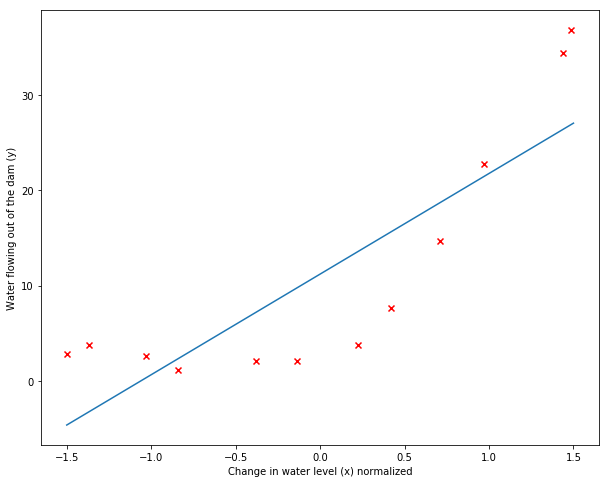

In [178]:
#visualize data
fig = plt.figure(figsize=(10,8))
plt.scatter(X1_normalized[...,1:],y,marker='x',color='r')
plt.xlabel('Change in water level (x) normalized')
plt.ylabel('Water flowing out of the dam (y)')
xrange = np.linspace(-1.5,1.5)
yrange = pred_y(xrange,theta1)
_=plt.plot(xrange,yrange)

In [199]:
#fit 8th order polynomial
lambd = 0
X8 = poly_features(x,8)
X8_normalized, X8_mean, X8_std = normalize_features(X8)
initial_theta = np.zeros((np.shape(X8)[1]))
res = optimize.minimize(fun=cost, x0=initial_theta, args=(X8_normalized,y,lambd), jac=grad, method=None, options={'maxiter':400, 'disp':True})
theta8 = res['x']

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 77
         Function evaluations: 78
         Gradient evaluations: 78


In [200]:
print(theta8)

[ 11.21758918   9.12523972  18.17176688  28.98472056 -27.19983046
 -74.61697337   6.66625796  60.80635119  20.73324805]


(-5, 40)

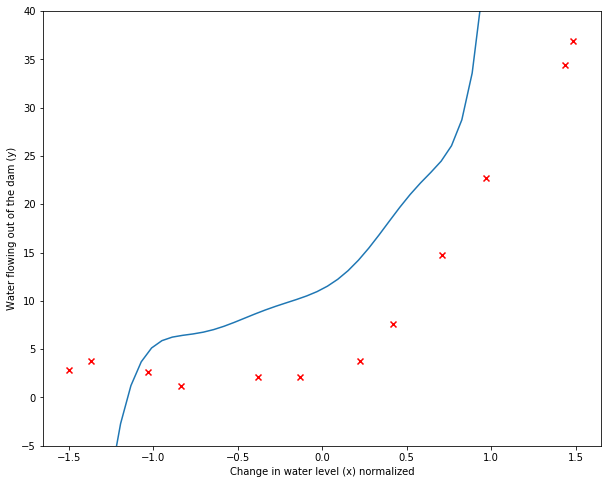

In [207]:
#visualize data
fig = plt.figure(figsize=(10,8))
plt.scatter(X8_normalized[...,1:2],y,marker='x',color='r')
plt.xlabel('Change in water level (x) normalized')
plt.ylabel('Water flowing out of the dam (y)')
xrange = np.linspace(-1.5,1.5)
yrange = pred_y(xrange,theta8)
_=plt.plot(xrange,yrange)
plt.ylim([-5,40])

In [232]:
theta8_gd = gradientDescent(X8_normalized,y,initial_theta,0.1,50000)

In [233]:
print(theta8_gd)

[ 11.21758933  10.89288034  14.02441137  10.57669773 -11.44494469
 -13.97257802   6.64754649   3.28942276  -4.47473565]


(-5, 40)

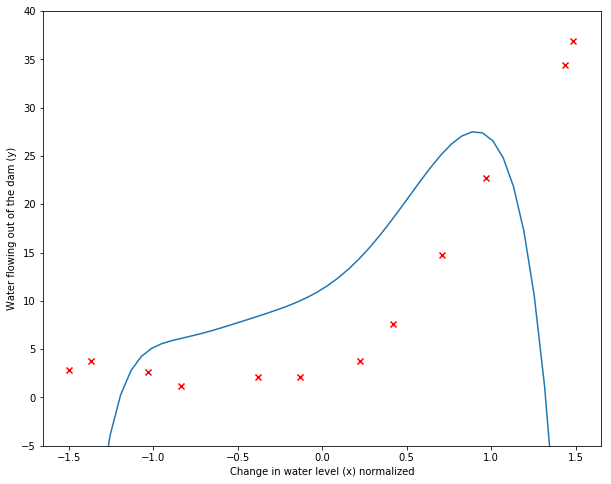

In [234]:
#visualize data
fig = plt.figure(figsize=(10,8))
plt.scatter(X8_normalized[...,1:2],y,marker='x',color='r')
plt.xlabel('Change in water level (x) normalized')
plt.ylabel('Water flowing out of the dam (y)')
xrange = np.linspace(-1.5,1.5)
yrange = pred_y(xrange,theta8_gd)
_=plt.plot(xrange,yrange)
plt.ylim([-5,40])